In [173]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib as jb

In [174]:
insu_data = pd.read_csv('insurance.csv')

In [175]:
insu_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [176]:
insu_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [177]:
insu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [178]:
insu_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [179]:
insu_data.shape

(1338, 7)

In [180]:
insu_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


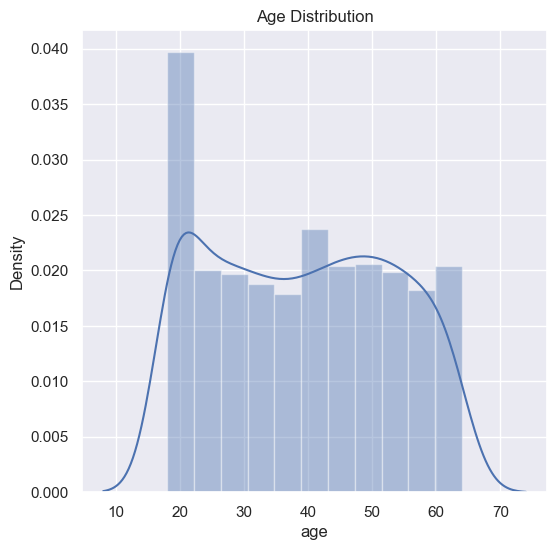

In [181]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insu_data['age'])
plt.title('Age Distribution')
plt.show()

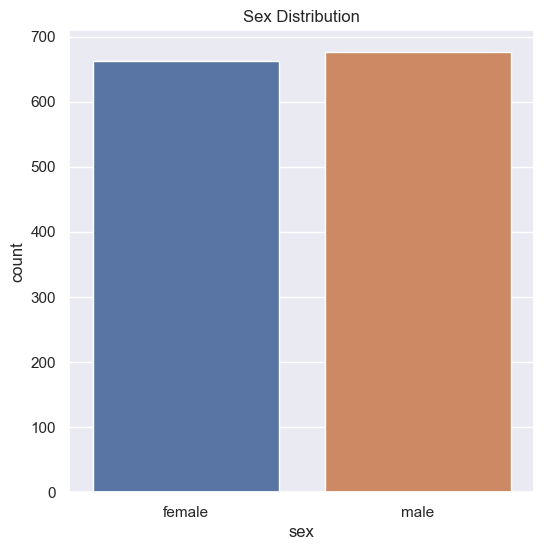

In [182]:
plt.figure(figsize = (6,6))
plt.title('Sex Distribution')
sns.countplot(x = 'sex' , data=insu_data)

plt.show()

In [183]:
insu_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


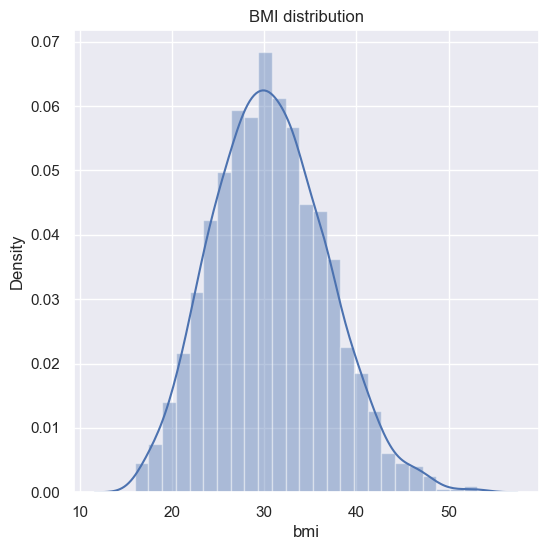

In [184]:
plt.figure(figsize= (6,6))
sns.distplot(insu_data['bmi'])
plt.title('BMI distribution')
plt.show()

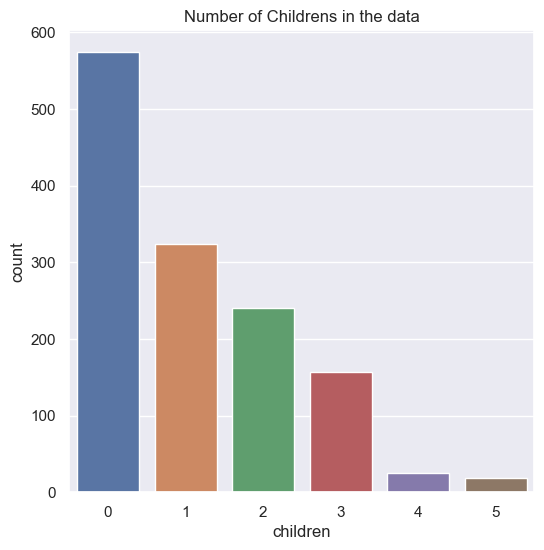

In [185]:
plt.figure(figsize = (6,6))
sns.countplot( x = 'children' , data = insu_data)
plt.title('Number of Childrens in the data')
plt.show()

In [186]:
insu_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

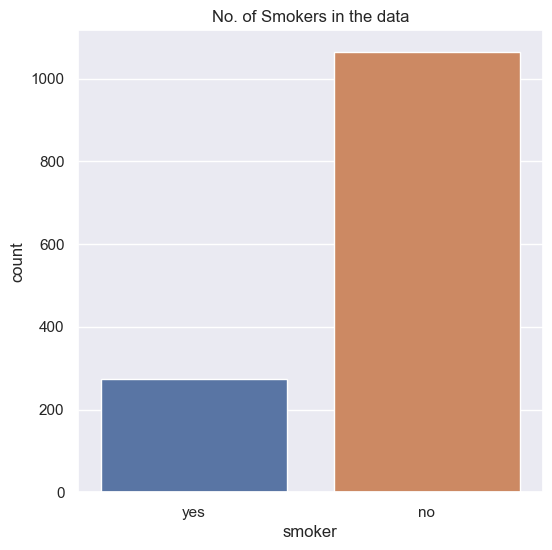

In [187]:
plt.figure(figsize=(6,6))
sns.countplot( x = 'smoker' , data = insu_data)
plt.title('No. of Smokers in the data')
plt.show()

In [188]:
insu_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

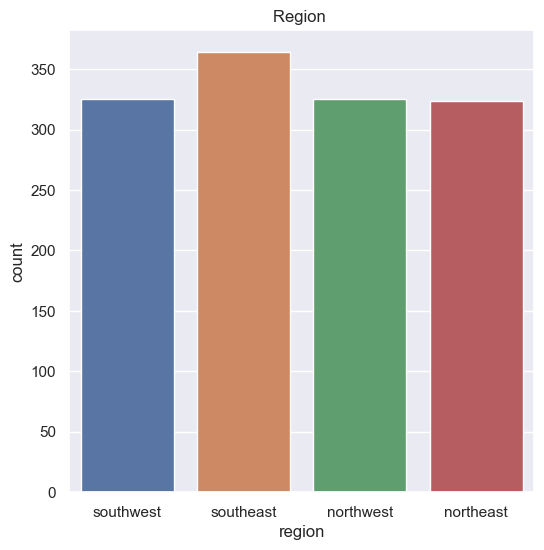

In [189]:
plt.figure(figsize = (6,6))
sns.countplot( x = 'region' , data = insu_data)
plt.title('Region ')
plt.show()

In [190]:
insu_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


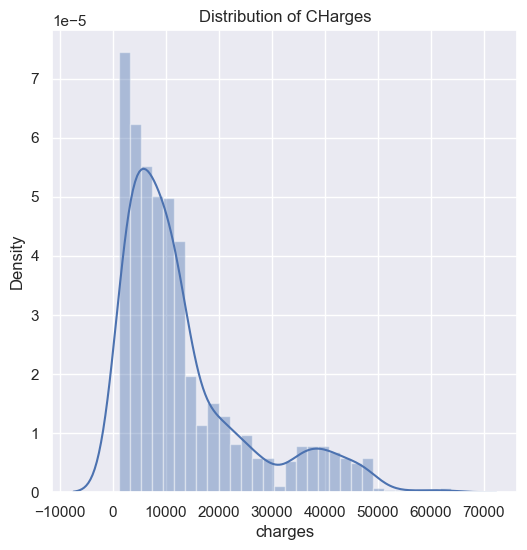

In [191]:
plt.figure(figsize= (6,6))
sns.distplot(insu_data['charges'])
plt.title('Distribution of CHarges')
plt.show()

In [192]:
insu_data.replace({ 'sex' : { 'female' : 1 , 'male' : 0} , 'smoker' : { 'yes' : 0 , 'no' : 1} , 'region' : {'southeast' : 0 , 'southwest' : 1 , 'northeast' : 2 , 'northwest' : 3}} , inplace = True)

In [193]:
print(insu_data)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


In [194]:
X = insu_data.drop(columns = ['charges'] , axis = 1)
Y = insu_data['charges']

In [195]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [196]:
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size = 0.2 , random_state = 2)

In [197]:
print(X.shape , X_train.shape , X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [198]:
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

LinearRegression()

In [201]:
train_prediction = regressor.predict(X_train)

test_prediction = regressor.predict(X_test)

score1 = metrics.r2_score( Y_train,train_prediction)

score2 =  metrics.r2_score(Y_test , test_prediction)

print('The accuracy score on training data is : ' , score1)
print('The accuracy score on test data is :' , score2)

The accuracy score on training data is :  0.751505643411174
The accuracy score on test data is : 0.7447273869684077


In [206]:
input_data = (46,1,33.44,1,1,0)

new_data = np.asarray(input_data)

new_data_rs = new_data.reshape(1, -1)

predictions = regressor.predict(new_data_rs)

print('The insurance price is USD' , predictions[0])




The insurance price is USD 10657.40884992147


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [207]:
jb.dump(regressor , 'MEDI_INSU_COST_PREDICTION.joblib')

['MEDI_INSU_COST_PREDICTION.joblib']